# MRIO Workshop

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 1.4 & 2 Load and clean data

### WIOT Data

In [2]:
lookup = pd.read_excel('Data/WIOT/wiot95_row_apr12.xlsx', index_col=None, header=None).iloc[6:,:4].set_index(1)
lookup[2].fillna('TOT', inplace=True)
lookup.columns = ['sector_code', 'country', 'sector']

In [3]:
lookup.head()

,sector_code,country,sector
1,,,
"Agriculture, Hunting, Forestry and Fishing",AtB,AUS,c1
Mining and Quarrying,C,AUS,c2
"Food, Beverages and Tobacco",15t16,AUS,c3
Textiles and Textile Products,17t18,AUS,c4
"Leather, Leather and Footwear",19,AUS,c5


In [4]:
# function for WIOT Data

def import_wiot(year):
    file_loc = 'Data/WIOT/wiot' + str(year)[2:] + '_row_apr12.xlsx'
    
    # import data
    df = pd.read_excel(file_loc, index_col=None, header=None).iloc[4:,2:]
    df[1644].fillna('Total', inplace=True)
    df[2].fillna('TOT', inplace=True)

    #set columns
    c1 = df.iloc[0].tolist()
    c1[0] = 'country'
    c2 = df.iloc[1].tolist()
    c2[1] = 'sector'
    df.columns = [c1, c2]

    # set index
    df = df.drop([4, 5], axis=0).set_index([('country', 'TOT'), (np.nan, 'sector')]).fillna(0)
    
    return(df)

In [5]:
year_list = []
for i in range(1995, 2012):
    year = i
    year_list.append(year)

In [6]:
wiot_list = []
for i in year_list:
    df = import_wiot(i)
    wiot_list.append(df)

In [7]:
# Z, V and Y matrices
z_list_a = []
v_list_a = []
y_list_a = []

Z_df = []
V_df = []
Y_df = []

col_list = []
for i in range(1, 36):
    c = 'c' + str(i)
    col_list.append(c)
    
for i in range(len(wiot_list)):
    z=wiot_list[i].drop('TOT', axis=0).swaplevel(axis=1).loc[:, col_list].swaplevel(axis=1)
    z_list_a.append(np.array(z))
    Z_df.append(z)
    
    v=wiot_list[i].swaplevel(axis=0).loc['r64'].swaplevel(axis=1).loc[:, col_list].swaplevel(axis=1)
    v_list_a.append(np.array(v))
    V_df.append(v)
    
    y=wiot_list[i].drop('TOT', axis=0).swaplevel(axis=1).loc[:,'c37']
    y_list_a.append(np.array(y))
    Y_df.append(y)

c:\Program Files\Anaconda3\lib\site-packages\pandas\core\generic.py:3111: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


In [8]:
# Change into matrices and save as Z, V, Y

Z_a = np.array(z_list_a)
V_a = np.array(v_list_a)
Y_a = np.array(y_list_a)

In [9]:
print(type(Z_a), type(V_a), type(Y_a))

<class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [10]:
print(Z_a.shape, V_a.shape, Y_a.shape)

(17, 1435, 1435) (17, 1, 1435) (17, 1435, 41)


## 3. Load the extension data

In [11]:
# country list 

country_list = ['AUS','AUT','BEL','BGR','BRA','CAN','CHN','CYP','CZE','DEU','DNK','ESP','EST','FIN','FRA','GBR','GRC','HUN','IDN','IND','IRL','ITA','JPN','KOR','LTU','LUX','LVA','MEX','MLT',
                'NLD','POL','PRT','ROU','RUS','SVK','SVN','SWE','TUR','TWN','USA','ROW']

country = np.array(country_list)

### Energy

F_NRG

In [12]:
# function for Energy Data --> make array of vecotrs containing total energy use per year per sector

def import_energy(country):
    array_list = []
    df_list = []
    file_loc = 'Data/EAS-EU/' + str(country) + '_EU_May12.xls'
    for year in range(1995, 2010):
        sheet = str(year)
        # import data
        df = pd.read_excel(file_loc, sheet_name=sheet, index_col=None).drop([(np.nan, np.nan)], axis=0).iloc[:36]
        df['Y'+str(year)] = df['TOTAL']
        df = df[['Y'+str(year)]].T.fillna(0)
        
        df_list.append(df)
        array_list.append(np.array(df))
        
    return(df_list, array_list)

In [13]:
array_list = []
df_list = []

for country in country_list:
    df_energy, a_energy = import_energy(country)
    array_list.append(a_energy)
    df_list.append(df_energy)
    
F_NRG_a = np.array(array_list)
F_NRG_df = df_list

In [14]:
type(F_NRG_a)

numpy.ndarray

In [15]:
F_NRG_a.shape

(41, 15, 1, 36)

F_NRG_hh

In [16]:
def import_energy_hh(country):
    array_list = []
    df_list = []
    file_loc = 'Data/EAS-EU/' + str(country) + '_EU_May12.xls'
    for year in range(1995, 2010):
        sheet = str(year)
        # import data
        df = pd.read_excel(file_loc, sheet_name=sheet, index_col=None).drop([(np.nan, np.nan)], axis=0).iloc[-2:-1] # select only household category
        df['Y'+str(year)] = df['TOTAL']
        df = df[['Y'+str(year)]].T.fillna(0)
        
        df_list.append(df)
        array_list.append(np.array(df))
        
    return(df_list, array_list)

In [17]:
array_list = []
df_list = []

for country in country_list:
    df_energy_hh, a_energy_hh = import_energy_hh(country)
    array_list.append(a_energy_hh)
    df_list.append(df_energy_hh)
    
F_NRG_hh_a = np.array(array_list)
F_NRG_hh_df = df_list

In [18]:
F_NRG_hh_a.shape

(41, 15, 1, 1)

### Air Quality

F_GHG

In [19]:
# function for Energy Data --> make array of vecotrs containing total energy use per year per sector

def import_air(country):
    array_list = []
    df_list = []
    file_loc = 'Data/EAS-AIR/' + str(country) + '_AIR_May12.xls'
    for year in range(1995, 2010):
        sheet = str(year)
        # import data (only from 35 sectors, remove totals)
        df = pd.read_excel(file_loc, sheet_name=sheet, index_col=None).drop([(np.nan, np.nan)], axis=0).iloc[:36]
        df = df[['CO2', 'CH4', 'N2O']]
        # convert to kilotonnes and then construct CO2e (using 100 year GWP, AR5; https://www.ghgprotocol.org/sites/default/files/ghgp/Global-Warming-Potential-Values%20%28Feb%2016%202016%29_1.pdf)
        df['CH4'] = (df['CH4'] / 1000) * 28
        df['N2O'] = (df['N2O'] / 1000) * 265
        df['CO2e_' + str(year)] = df['CO2'] + df['CH4'] + df['N2O']
        df = df[['CO2e_' + str(year)]].T.fillna(0)
        
        df_list.append(df)
        array_list.append(np.array(df))
        
    return(df_list, array_list)

In [20]:
array_list = []
df_list = []

for country in country_list:
    df_air, a_air = import_air(country)
    array_list.append(a_air)
    df_list.append(df_air)
    
F_GHG_a = np.array(array_list)
F_GHG_df = df_list

In [21]:
type(F_GHG_a)

numpy.ndarray

In [22]:
F_GHG_a.shape

(41, 15, 1, 36)

F_GHG_hh

In [23]:
# function for Energy Data --> make array of vecotrs containing total energy use per year per sector

def import_air_hh(country):
    array_list = []
    df_list = []
    file_loc = 'Data/EAS-AIR/' + str(country) + '_AIR_May12.xls'
    for year in range(1995, 2010):
        sheet = str(year)
        # import data (only from 35 sectors, remove totals)
        df = pd.read_excel(file_loc, sheet_name=sheet, index_col=None).drop([(np.nan, np.nan)], axis=0).iloc[-2:-1] # select only household category
        df = df[['CO2', 'CH4', 'N2O']]
        # convert to kilotonnes and then construct CO2e (using 100 year GWP, AR5; https://www.ghgprotocol.org/sites/default/files/ghgp/Global-Warming-Potential-Values%20%28Feb%2016%202016%29_1.pdf)
        df['CH4'] = (df['CH4'] / 1000) * 28
        df['N2O'] = (df['N2O'] / 1000) * 265
        df['CO2e_' + str(year)] = df['CO2'] + df['CH4'] + df['N2O']
        df = df[['CO2e_' + str(year)]].T.fillna(0)
        
        df_list.append(df)
        array_list.append(np.array(df))
        
    return(df_list, array_list)

In [24]:
array_list = []
df_list = []

for country in country_list:
    df_air_hh, a_air_hh = import_air_hh(country)
    array_list.append(a_air_hh)
    df_list.append(df_air_hh)
    
F_GHG_hh_a = np.array(array_list)
F_GHG_hh_df = df_list

In [25]:
F_GHG_hh_a.shape

(41, 15, 1, 1)

# 4. Save matrices as files

In [26]:
mat_list = ['Z_a', 'V_a','Y_a', 'F_NRG_a', 'F_NRG_hh_a', 'F_GHG_a', 'F_GHG_hh_a', 'country']

for mat in mat_list:
    np.save('Data/Matrices/' + str(mat) + '_mat.npy', eval(mat))

# 5. Calculating energy and emissions consumption-based accounts

use http://www.see.leeds.ac.uk/teaching-resources/exercise-pages/l4-input-output-tutorial-201617/ for reference

### 5.1. The UK's production and conumption based GHG emissions from 1995-2009

UK Production

In [27]:
# fnd index position for UK
UK = country_list.index('GBR')

In [33]:
# using df

UK_production = []
prod_year = []

for i in range(len(F_GHG_hh_df[UK])):
    ghg = F_GHG_hh_df[UK][i].sum(axis=1) + F_GHG_df[UK][i].sum(axis=1)
    UK_production.append(ghg)
    
# using arrays

UK_production_a = []
prod_year_a = []

for i in range(len(F_GHG_hh_a[UK])):
    ghg = F_GHG_hh_a[UK][i].sum(axis=1) + F_GHG_a[UK][i].sum(axis=1)
    UK_production_a.append(ghg)

In [29]:
#df
UK_production_df = pd.DataFrame(UK_production).T.fillna(0)
years = []
for i in UK_production_df.index.tolist():
    year = i[-4:]
    years.append(year)
UK_production_df.index = years

UK_production_df['Production CO2e'] = UK_production_df.sum(axis=1)
UK_production_df = UK_production_df[['Production CO2e']]

(0, 1200000)

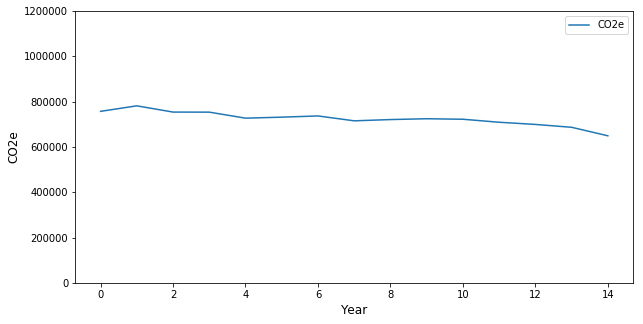

In [76]:
fig, ax = plt.subplots(figsize=(10, 5))

UK_production_df.plot(ax=ax)

ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('CO2e', fontsize=12)

#ax.set_xticklabels(, fontsize=12)
#ax.set_yticklabels(range(-100000, 800000, 100000), fontsize=12)

ax.set_ylim([0,1200000])

In [55]:
# array

CO2e_list = []

for i in range(len(UK_production_a)):
    ghg = UK_production_a[i][0]
    CO2e_list.append(ghg)

UK_production_df = pd.DataFrame(data=[years, CO2e_list]).T
UK_production_df.columns = ['Year', 'CO2e']

(0, 1200000)

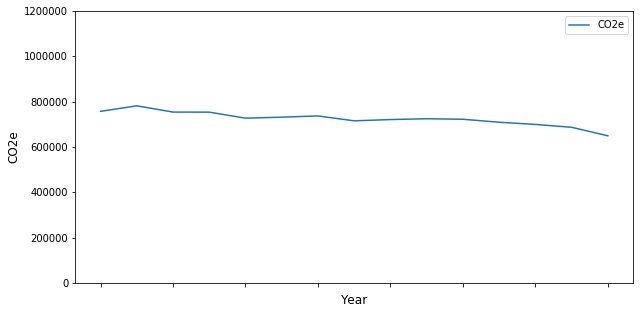

In [75]:
fig, ax = plt.subplots(figsize=(10, 5))

UK_production_df.plot(ax=ax, x='Year', y='CO2e')

ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('CO2e', fontsize=12)

ax.set_ylim([0,1200000])

UK Consumption

In [254]:
# calculate x for each year (column sum of Z plus V)

x_list = []
for i in range(len(Z_a)):
    x_temp = Z_a[i].sum(axis=0) + V_a[i]
    x_list.append(x_temp)
x1 = np.array(x_list).reshape(17, 1435, 1)

In [309]:
# calculate x for each year (row sum of Z plus Y)

x_list = []
for i in range(len(Z_a)):
    x_temp = Z_a[i].sum(axis=1) + Y_a[i].sum(axis=1)
    x_list.append(x_temp.reshape(1435,1))
x = np.array(x_list)

In [314]:
# calculate A by dot dividing Z by big_x, element-wise division in python is done by using '/', floor division by using '//'

big_x = []
for i in range(len(x)):
    new_x = x[i].repeat(len(x[i]), axis=1)
    big_x.append(new_x)

big_x_a = np.array(big_x) + 0.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000001 # add this to avoid trying to divide by zero

A_a = Z_a/big_x_a

In [326]:
# check that all are below 1

print('Min: ' + str(A_a.min()), '\t', 'Max: ' + str(A_a.max()))

Min: 0.0 	 Max: 0.8405476361287894


In [338]:
# Get the Leontief inverse

# get I
I = np.identity(Z_a.shape[1])

# Lenotief inverse for all years
L_list = []
for i in range(len(A_a)):
    L = np.linalg.inv(I-A_a[i])
    L_list.append(L)
L_a = np.array(L_list)

In [341]:
# calculate emissions intensity factor e = inv()

x.shape

(17, 1435, 1)

In [347]:
F_GHG_a[UK].shape

(15, 1, 36)

In [348]:
UK_production_a

[array([756969.24041]),
 array([781313.06623]),
 array([753734.29658]),
 array([753453.1097]),
 array([726871.04324]),
 array([731285.18858]),
 array([736704.72499]),
 array([715108.09397]),
 array([720686.46812]),
 array([724320.62645]),
 array([722077.42889]),
 array([708839.52615]),
 array([699205.92478]),
 array([686594.87012]),
 array([649032.11909901])]

In [349]:
F_GHG_a[UK][1]

array([[6.37207092e+04, 4.68722938e+04, 1.06957267e+04, 2.43191185e+03,
        1.47854510e+02, 1.20783704e+03, 5.69000139e+03, 2.38622860e+04,
        2.86542279e+04, 5.01738897e+03, 1.73800434e+04, 3.70412287e+04,
        2.15927909e+03, 1.87143911e+03, 3.05135424e+03, 2.72413147e+03,
        1.77413585e+05, 9.13654938e+03, 2.65842779e+03, 6.97693180e+03,
        3.70113870e+03, 2.90555216e+03, 2.75738547e+04, 2.00888447e+04,
        2.63524767e+04, 1.05134466e+03, 1.87454142e+03, 1.66572528e+03,
        1.25126587e+03, 4.64377794e+03, 9.92141983e+03, 4.75606150e+03,
        5.98335733e+03, 6.47317172e+04, 2.02019580e+02, 0.00000000e+00]])